In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [158]:
df = pd.read_csv("../data/data.csv")
X, y = df.iloc[:,:-1], df.iloc[:, -1]


# Check Values

## Check nulls

In [159]:
print(df.isnull().sum().sum())

0


## Check values

In [160]:
X.describe()

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4
count,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000,14980.000000
mean,4321.917777,4009.767694,4264.022433,4164.946326,4341.741075,4644.022379,4110.400160,4616.056904,4218.826610,4231.316200,4202.456900,4279.232774,4615.205336,4416.435832
std,2492.072174,45.941672,44.428052,5216.404632,34.738821,2924.789537,4600.926543,29.292603,2136.408523,38.050903,37.785981,41.544312,1208.369958,5891.285043
min,1030.770000,2830.770000,1040.000000,2453.330000,2089.740000,2768.210000,2086.150000,4567.180000,1357.950000,1816.410000,3273.330000,2257.950000,86.666700,1366.150000
25%,4280.510000,3990.770000,4250.260000,4108.210000,4331.790000,4611.790000,4057.950000,4604.620000,4190.770000,4220.510000,4190.260000,4267.690000,4590.770000,4342.050000
50%,4294.360000,4005.640000,4262.560000,4120.510000,4338.970000,4617.950000,4070.260000,4613.330000,4199.490000,4229.230000,4200.510000,4276.920000,4603.080000,4354.870000
75%,4311.790000,4023.080000,4270.770000,4132.310000,4347.180000,4626.670000,4083.590000,4624.100000,4209.230000,4239.490000,4211.280000,4287.180000,4617.440000,4372.820000
max,309231.000000,7804.620000,6880.510000,642564.000000,6474.360000,362564.000000,567179.000000,7264.100000,265641.000000,6674.360000,6823.080000,7002.560000,152308.000000,715897.000000


In [161]:
y.value_counts()

0    8257
1    6723
Name: label, dtype: int64

## Remove Outlier

In [162]:
df = df[((df <= 5000).all(axis=1))]

In [163]:
df

,AF3,F7,F3,FC5,T7,P7,O1,O2,P8,T8,FC6,F4,F8,AF4,label
0,4329.23,4009.23,4289.23,4148.21,4350.26,4586.15,4096.92,4641.03,4222.05,4238.46,4211.28,4280.51,4635.90,4393.85,0
1,4324.62,4004.62,4293.85,4148.72,4342.05,4586.67,4097.44,4638.97,4210.77,4226.67,4207.69,4279.49,4632.82,4384.10,0
2,4327.69,4006.67,4295.38,4156.41,4336.92,4583.59,4096.92,4630.26,4207.69,4222.05,4206.67,4282.05,4628.72,4389.23,0
3,4328.72,4011.79,4296.41,4155.90,4343.59,4582.56,4097.44,4630.77,4217.44,4235.38,4210.77,4287.69,4632.31,4396.41,0
4,4326.15,4011.79,4292.31,4151.28,4347.69,4586.67,4095.90,4627.69,4210.77,4244.10,4212.82,4288.21,4632.82,4398.46,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14975,4281.03,3990.26,4245.64,4116.92,4333.85,4614.36,4074.87,4625.64,4203.08,4221.54,4171.28,4269.23,4593.33,4340.51,1
14976,4276.92,3991.79,4245.13,4110.77,4332.82,4615.38,4073.33,4621.54,4194.36,4217.44,4162.56,4259.49,4590.26,4333.33,1
14977,4277.44,3990.77,4246.67,4113.85,4333.33,4615.38,4072.82,4623.59,4193.33,4212.82,4160.51,4257.95,4591.79,4339.49,1
14978,4284.62,3991.79,4251.28,4122.05,4334.36,4616.41,4080.51,4628.72,4200.00,4220.00,4165.64,4267.18,4596.41,4350.77,1


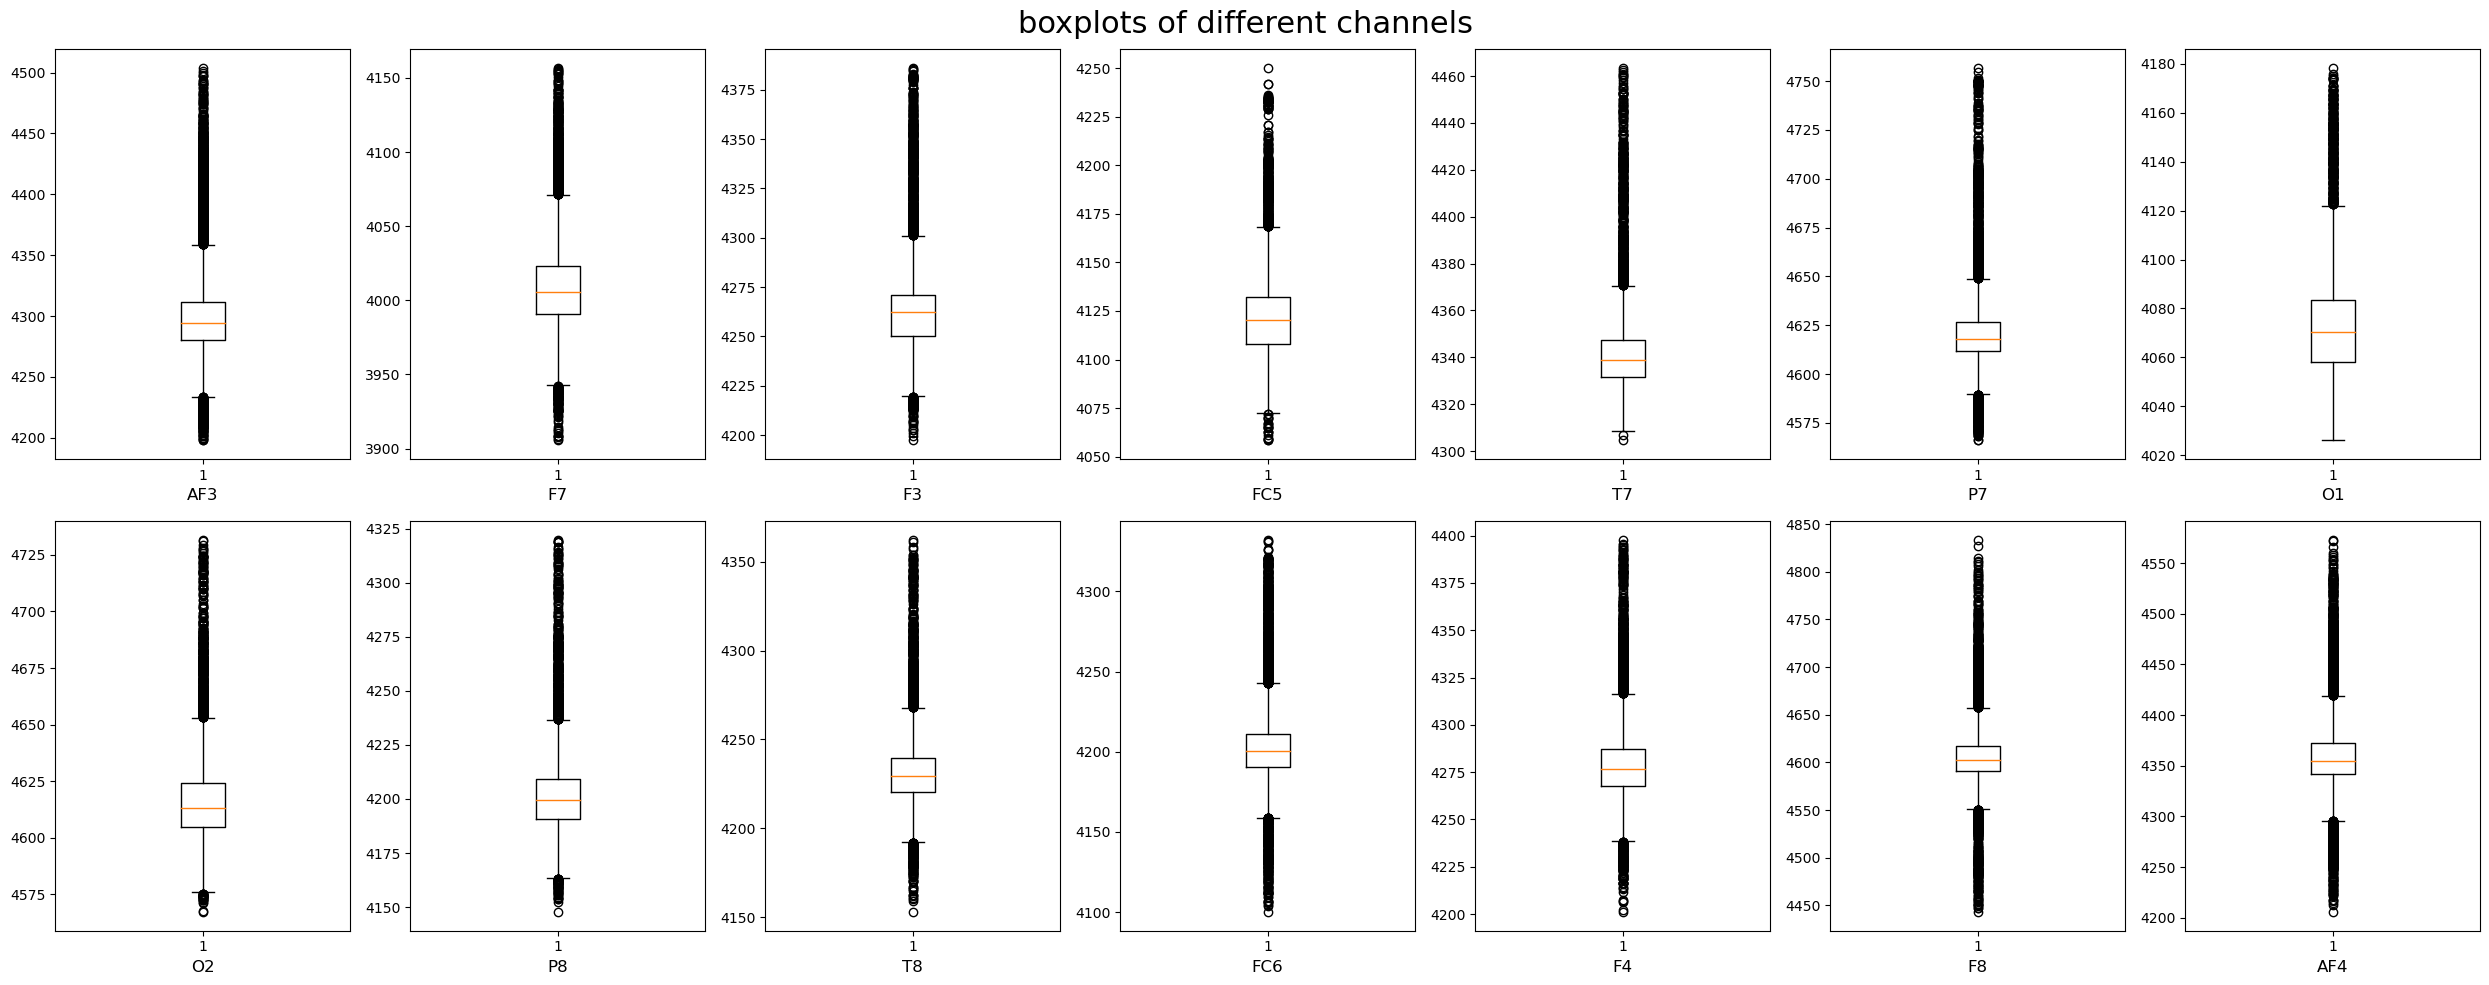

In [198]:
f, axes = plt.subplots(2, 7, figsize = [25, 10])
cols = df.columns[:-1]
for ax, col in zip(axes.reshape(1, -1)[0], cols):
    ax.boxplot(df[col])
    ax.set_xlabel(col, fontsize=12)
f.suptitle("boxplots of different channels",fontsize=22)
f.tight_layout()
f.savefig("boxplots.jpg")

# time signal graph

In [152]:
# k = 3
# f, axes = plt.subplots(k, 1, figsize=[20, 10])
# n, d = df.shape
# X, y = df.iloc[:,:-1], df.iloc[:, -1]
# ceil = np.ceil(d / k)
# for i, ax in enumerate(axes):
#     sns.lineplot(X.iloc[:, i*k:(i+1)*k],ax = ax)
# X_min, X_max = int(min(X.min())), int(max(X.max()))
# dots = []
# for i, j in y.iteritems():
#     if j:
#         for k in range(X_min, X_max):
#             dots.append([i, k])
# dots = np.array(dots)
# for ax in axes:
#     sns.scatterplot(x=dots[:,0], y=dots[:,1], s=0.6, color = "#A8842B", ax = ax)
# f.tight_layout()
# f.savefig("time_freq_close.jpg")
# f.show()